In [61]:
#DGP
import numpy as np
import pandas as pd
import random

# n = 200  #firm num
# T = 100  #time num
#To simplify the simulation, we change the x_{i,(t-1)} ,r_{i,t} to x_n, r_n, 
# which means denote all the variable with  n th news rather than i th firm in t th day
np.random.seed(66)
S = 10000  #word num
n = 500   #news num
p = 3  #dim of latent space

#x ~ Normal
mu_x = 0.03
sigma_x = 0.05
x = np.random.normal(mu_x,sigma_x,(n,p))  #latent variable n x p

# beta controls signal-noise ratio 0.5, 10, 100 ###normal?
beta = np.random.normal(1,0,p) 
#noise~ Normal
sigma_epsilon = 0.05
epsilon = np.random.normal(0,sigma_epsilon,n)

# return
r = x @ beta + epsilon 
ratio_r = np.var(x @ beta)/(np.var(x @ beta)+np.var(epsilon))

#Gamma controls sentiment signals S x p
K = 10 #num of neg/pos sentiment words nums
s1 = 5 #lower bound of the sentiment strength  (non-neg)
s2 = 15 #upper bound of the sentiment strength 
gamma = np.zeros((S,p))  
gamma[:K] = np.random.uniform(s1,s2,(K,p)) 
gamma[-K:] = np.random.uniform(-s2,-s1,(K,p))

#theta control the sparsity of word matrix W
mu_b = 0.5
mu_theta = -10
sigma_theta = 0.05
theta = np.random.binomial(1, mu_b,(n,S)) * np.random.normal(mu_theta, sigma_theta,(n,S))

#paramenter of Poisson distribution
lam = np.exp( x @ gamma.T + theta)

# words count matrix
W = np.random.poisson(lam,(n,S))


# words count of each article
total_words_example = np.mean(np.sum(W,axis=1))

## calculate sparcity 
sparcity = 1 - np.count_nonzero(W)/W.size

print("sparsity of W:", sparcity)
print("signal-to-noise ratio:", ratio_r)
print("neg return num:",np.sum(r<0) )



sparsity of W: 0.6836442
signal-to-noise ratio: 0.7283950587566218
neg return num: 81


In [65]:
'''
Author: Naixin && naixinguo2-c@my.cityu.edu.hk
Date: 2022-11-01 14:50:18
LastEditors: Naixin && naixinguo2-c@my.cityu.edu.hk
LastEditTime: 2022-11-01 14:52:17
FilePath: /Gtext/xiu/fixword_ex.ipynb
Description: 

'''

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import TruncatedSVD
from scipy import sparse


##################### Could be changed part ##########################
sparse_folder = 'results_primary_news_sparse_multiyears/'
index_folder = 'results_primary_news_index_multiyears/'

sparse_file = '2005_2020_sparse/2005_2014_sparse_threecol.csv'
index_file = '2005_2020_index_news/2005_2014_index_news.csv'
word_file = '2005_2014_stemmed_word_count.csv'

# sparse_file0 = '2005_2020_sparse/2015_2019_sparse_threecol.csv'
# index_file0 = '2005_2020_index_news/2015_2019_index_news.csv'


# sparse_file1 = '2005_2020_sparse/2020_2020_sparse_threecol.csv'
# index_file1 = '2005_2020_index_news/2020_2020_index_news.csv'

######################################################################

######################## Could be put in the function module py file ########################
# Define a function to transform data from three columns to sparse matrix
def trans_data(sparse_data, news_data, word_data):
    '''
    :param sparse_data: the three column saved words DataFrame includes 'Row', 'Column', 'Value'
    :param news_data: news DataFrame includes 'Row_ID', 'permno', 'returnday_1', 'threedayreturn', 'title'
    :param word_data: words DataFrame includes 'WordIndex', 'final_word', 'TotalWordNum', 'TotalBodyNum'

    :return W_array: sparse matrix of word counts, n*k --> n: # of news, k: # of words
    :return r_array: return vector, length == # of news
    :return stkcd_array: permno vector, length == # of news
    :return date_array: date vector, length == # of news
    '''
    if 'return' in news_data.columns :
        r_array = np.array(news_data['return'])
        date_array = np.array(news_data['returnday'])
    else:  
        r_array = np.array(news_data['threedayreturn'])
        date_array = np.array(news_data['returnday_1'])
    stkcd_array = np.array(news_data['permno'])
    
    
    # Transform three columns to sparse matrix W
    newrowarray = np.array(sparse_data['Row'])
    newcolarray = np.array(sparse_data['Column'])
    newvaluearray = np.array(sparse_data['Value'])

    W_array = sparse.csr_matrix((newvaluearray, (newrowarray, newcolarray)), shape = (newrowarray[-1]+1, word_data.shape[0])).toarray()

    return W_array, r_array, stkcd_array, date_array

#############################################################################################

# Load in data set
df_sparse = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + sparse_folder + sparse_file)
df_newsindex = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + index_folder + index_file)
df_words = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + word_file)
df_words = df_words.dropna().reset_index(drop = True).reset_index()

# df_sparse0= pd.read_csv('/home/yuanzhi/Text_individual/codes/' + sparse_folder + sparse_file0)
# df_newsindex0 = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + index_folder + index_file0)


# df_sparse1= pd.read_csv('/home/yuanzhi/Text_individual/codes/' + sparse_folder + sparse_file1)
# df_newsindex1 = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + index_folder + index_file1)

W_train, r_train, stkcd, datearray = trans_data(df_sparse, df_newsindex, df_words)
# W_vali, r_vali, stkcd0, datearray0 = trans_data(df_sparse0, df_newsindex0, df_words)
# W_test, r_test, stkcd1, datearray1 = trans_data(df_sparse1, df_newsindex1, df_words)



In [16]:
x=[1,2]
x.index(2)

1

In [ ]:
import numpy as np
from time import process_time

start = process_time()

elapsed = (process_time() - start)

print("eigh elapsed time: ", elapsed)



In [110]:
'''

'''
import heapq
import os

import numpy as np
import pandas as pd
from scipy import sparse
from sklearn import linear_model
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import Lasso  # ##导入Lasso回归算法


import matplotlib
import matplotlib.pyplot as plt

from bisect import bisect_left

#someusful funcs
def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    return after if after - myNumber < myNumber - before else before

################## Could be changed part #######################


####################
class Farmpredict:
    '''
    Input:
        n: Number of news, int
        S: Number of words, we choose 10,000 here, int
        p: How many PCA Factors want to choose, according Fan(2021), int
        r: stock return vector, n*1, array
        W_train: sparse matrix of total dataset, dimension in n * K, array
    
    Return:
        S_set: correlation screening results, list in length of 1000
        lasso_index: Non-zero index of optimal lasso model of S_set, list
        lasso_Beta: optimal lasso model's coefficients, array
        lasso_beta: Non-zero coefficients of optimal lasso model
        loading: In-Sample B_hat
        insregLRcoef: In-Sample linear regression coefficients between r and pcafactor
        lasso_alpha: optimal lasso model's intercept
        insregLRint: In-Sample linear regression intercept between r and pcafactor
    '''
    def __init__(self):
        self.p = 10
        self.W_train = W_train
        self.r_train = r_train
        self.freqnum = 10000
        self.screen_num = 1000 # screening number
        
        self.pcafactor = 0
        self.pcau = 0
        self.loading = 0
        
        self.variable_num = 100 # final words want to choose
        self.jobs = 30

    # First screen
    def pca(self):
        Wsum = sum(self.W_train)
        freq_index = [heapq.nlargest(self.freqnum, enumerate(Wsum), key=lambda x: x[1])[i][0] for i in range(self.freqnum)]

        W_train = self.W_train[:,freq_index]
        print('W_train first screen done:',W_train.shape)
        # PCA for words count matrix 
        svdtest = TruncatedSVD(n_components=self.p, n_iter=7, random_state=64)
        self.pcafactor = svdtest.fit_transform(W_train) 
        self.loading = svdtest.components_.T 
        self.pcau = np.array(W_train - (self.pcafactor @ self.loading.T))
        
        # print('singular_values', svdtest.singular_values_)
        
        figure=plt.figure(figsize=(5,3))
        sing_vals=np.arange(len(svdtest.singular_values_)) + 1
        plt.plot(sing_vals,svdtest.singular_values_/100, 'x-', markersize=3,linewidth=1)
        plt.title('Scree Plot')
        plt.xlabel('Principal Component')
        plt.ylabel('Adjusted Eigenvalue') 
        plt.show() 

    # output In-Sample B_hat
        print('pca done')    
        return self.pcafactor, self.pcau,self.loading
         
    # linear regression of return on estimated factor
    # r ~ a_1 + regcoef*pcafactor + r_u
    def fit(self):
    # initial parameters
        regLR = linear_model.LinearRegression(n_jobs= self.jobs)

    # fit model 
        regLR.fit(self.pcafactor,self.r_train)
        insregLRint = regLR.intercept_  # output In-Sample linear regression intercept
        insregLRcoef = regLR.coef_   # output In-Sample linear regression coefficients
        yu = self.r_train - insregLRint- self.pcafactor @ insregLRcoef
        
        #Second screen
        # calculate correlation (r_u, pcau)
    
        corrvector = [abs(np.corrcoef(yu,self.pcau[:,i]))[0,1] for i in range(self.freqnum)]
        S_set = [heapq.nlargest(self.screen_num, enumerate(corrvector), key=lambda x: x[1])[i][0] for i in range(self.screen_num)]
        
    # lasso fitting
    # screening set

        pcaus = self.pcau[:,S_set]

        # linear regression of idiosyncratic components on estimated factor
        # pcaus ~ a_2 + regcoef*pcafactor + x_tilde

        # initial parameters
        regLR_u = linear_model.LinearRegression(n_jobs= self.jobs)
        
        # fit model 
        xtilde = np.zeros((n,self.screen_num))
        for i in range(self.screen_num):
            regLR_u.fit(self.pcafactor,pcaus[:,i])
            xtilde[:,i] = pcaus[:,i] - regLR_u.intercept_ - self.pcafactor @ regLR_u.coef_ 
        
        l_num = 200
        lambdas = 10 ** np.linspace(-4,-2,num=l_num)
        
    # prepare data for enumerate
        coeff_num = np.zeros(l_num)
        coeff_beta = np.zeros((l_num, self.screen_num))
        # enumerate through lambdas with index and i
        for key, value in enumerate(lambdas):    
            reg = Lasso(alpha = value)
            reg.fit(xtilde, yu)
        
            coeff_beta[key,:] = reg.coef_
            coeff_num[key] = len(np.nonzero(reg.coef_)[0])
        print('coeff_beta',coeff_beta,'coeff_num',coeff_num)
        # returns the lambda value where number of variables has number of 20 or near 20.
        print(take_closest(coeff_num,self.variable_num))
        best_lambda = lambdas[list(coeff_num).index(take_closest(coeff_num,self.variable_num))]
        print("best_lambda", best_lambda)
        # build up optimal model 
        # r_u ~ alpha + x_tilde*beta
        lasso_best = Lasso(alpha=best_lambda)
        
        lasso_best.fit(xtilde,yu)
            
        # get optimal model's coefficients 
        lasso_Beta = lasso_best.coef_

        lasso_index0 =  list(np.nonzero(lasso_Beta)[0])
        lasso_index = [S_set[i] for i in lasso_index0]

        
        lasso_beta = lasso_Beta[lasso_index0]

    # print(lasso_index)
    
        return S_set,lasso_index,lasso_Beta,lasso_beta,self.loading,insregLRcoef, lasso_best.intercept_,insregLRint    

In [ ]:
loading

182336
W_train first screen done: (182336, 10000)


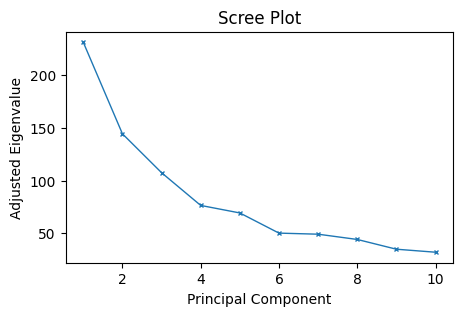

pca done


(array([[ 1.14091766,  0.12982047, -0.12287126, ..., -0.16622406,
         -0.03952766, -0.02810746],
        [12.80304007, -9.25174154, -0.82335345, ..., -0.73092338,
         -1.23587291, -7.02311951],
        [ 0.55779474,  0.09800336, -0.06631012, ..., -0.31725683,
         -0.16851604,  0.26576714],
        ...,
        [ 1.31167912, -0.95370998,  0.31159577, ...,  0.58293118,
         -0.37422503, -0.17090574],
        [ 1.47198879, -0.87050452,  0.0548894 , ...,  1.44234661,
         -1.1205935 ,  0.94841949],
        [ 3.44153695, -0.17366175, -0.01162879, ...,  1.31956435,
         -0.77477294,  1.08506217]]),
 array([[ 0.11681923,  0.58638776, -0.1312789 , ..., -0.00001509,
         -0.00004216,  0.00001012],
        [ 1.45644237,  5.41749143,  4.1222589 , ..., -0.00000158,
          0.0001662 , -0.00010629],
        [ 0.01850248, -0.1283642 , -0.01958683, ..., -0.00000164,
         -0.0000126 ,  0.00000136],
        ...,
        [-0.38193013,  1.37406268,  0.68804082, ..., -

In [111]:
# r_train=r
# W_train=W
arraynumber = len(r_train)
n,S = W_train.shape
print(arraynumber)
Farmpredict = Farmpredict()
Farmpredict.pca()


In [112]:

S_set,lasso_index,lasso_Beta,lasso_beta,loading,insregLRcoef,lasso_alpha,insregLRint = Farmpredict.fit()

[[ 0.00341692  0.00149704  0.00949999 ...  0.         -0.
   0.        ]
 [ 0.00340883  0.00150065  0.00927775 ...  0.         -0.
   0.        ]
 [ 0.00340096  0.0015041   0.00905023 ...  0.         -0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.         -0.
   0.        ]
 [ 0.          0.          0.         ...  0.         -0.
   0.        ]
 [ 0.          0.          0.         ...  0.         -0.
   0.        ]] [323. 318. 312. 308. 307. 302. 294. 292. 287. 285. 281. 279. 274. 268.
 260. 258. 258. 255. 250. 251. 246. 244. 238. 237. 233. 231. 230. 226.
 219. 217. 211. 203. 201. 196. 193. 186. 182. 177. 175. 174. 177. 170.
 167. 167. 166. 161. 158. 159. 155. 154. 150. 144. 143. 141. 139. 135.
 134. 133. 131. 130. 129. 128. 125. 123. 121. 118. 118. 111. 109. 105.
 103. 104. 102.  90.  91.  91.  86.  85.  83.  80.  78.  78.  76.  72.
  70.  68.  64.  65.  64.  62.  61.  59.  60.  58.  54.  52.  52.  50.
  50.  50.  47.  47.  47.  46.  46.  44.  45.  43.  43.  44

In [114]:
lasso_index 

[]

In [ ]:
def calc_perform(n, B, W, lassoBeta, lassoIndex, r, insregLRint, insregLRcoef, lasso_alpha):
    '''
    Input:
        n: Number of News, same as input n of Farmpredict
        B: loading, same as output loading of Farmpredict
        W: sparse matrix, same as input W of Farmpredict
        lassoBeta: optimal lasso model's coefficients, same as output lasso_beta of Farmpredict
        r: stock return, same as input r of Farmpredict
        insregLRint: same as output insregLRint of Farmpredict
        insregLRcoef: same as output insregLRcoef of Farmpredict
        lasso_alpha: same as output lasso_alpha of Farmpredict
    Return:
        Rsquare: R2 calculate by function calc_R2
        Rmse: RMSE calculate by function calc_RMSE
        r_new_hat: predicted stock returns
    '''
    pcafactor_new = ((np.linalg.inv(B.T @ B)) @ (B.T) @ (W.T)).T
    pcau_new = W - (B @ (pcafactor_new.T)).T
    
    pcaus_new = pcau_new[:,lassoIndex]

    regLR_u_new = linear_model.LinearRegression(n_jobs=jobs)
    
    xtilde_new = np.zeros((n, len(lassoIndex)))
    for i in range(len(lassoIndex)):
        regLR_u_new.fit(pcafactor_new, pcaus_new[:,i])
        xtilde_new[:,i] = pcaus_new[:,i] - regLR_u_new.intercept_ - pcafactor_new @ regLR_u_new.coef_
        
    yu_new = xtilde_new @ lassoBeta + lasso_alpha
    
    r_new_hat = insregLRint + yu_new + pcafactor_new @ insregLRcoef
        
    Rsquare = calc_R2(r, r_new_hat)
    Rmse = calc_RMSE(r, r_new_hat, n)
    
    return Rsquare,Rmse,r_new_hat